In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

from sklearn.preprocessing import MinMaxScaler

plt.rcParams.update({
    "text.usetex": False
})

import matplotlib.pylab as pylab

params = {'axes.titlesize': 12,
          'font.size': 12}
pylab.rcParams.update(params)

## Data

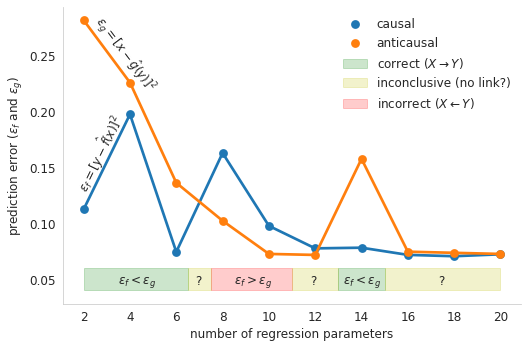

In [23]:
seed = 8
np.random.seed(seed)

n = 1000
X = np.random.randn(n)
Y = np.sin(X) + np.random.randn(n)

scaler = MinMaxScaler(feature_range=(-1, 1))
Y = scaler.fit_transform(Y.reshape(-1, 1)).flatten()
X = scaler.fit_transform(X.reshape(-1, 1)).flatten()

X_2d = X.reshape(-1, 1)
Y_2d = Y.reshape(-1, 1)

f_scores = []
g_scores = []
params = range(2, 22, 2)
max_iter = 200

for h in params:
    # y = f(x)
    f = MLPRegressor((h,), alpha=0.0, max_iter=max_iter, batch_size=n)
    f.fit(X_2d, Y)
    mse_f = mean_squared_error(Y, f.predict(X_2d).flatten())
    f_scores.append(mse_f)

    # x = g(y)
    g = MLPRegressor((h,), alpha=0.0, max_iter=max_iter, batch_size=n)
    g.fit(Y_2d, X)
    mse_g = mean_squared_error(X, g.predict(Y_2d).flatten())
    g_scores.append(mse_g)


df_f = pd.DataFrame(np.array(f_scores), columns=['mse'])
df_f['h'] = params
#df_f['direction'] = "$y=f(x)$"
df_f['direction'] = "causal"

df_g = pd.DataFrame(np.array(g_scores), columns=['mse'])
df_g['h'] = params
#df_g['direction'] = "$x=g(y)$"
df_g['direction'] = "anticausal"

df = pd.concat([df_f, df_g], axis=0)

sns.set_style("whitegrid", {'axes.grid' : False})

g = sns.catplot(data=df, x='h', y='mse', hue='direction', kind='point', legend=False, height=5, aspect=1.5)
g.set(ylabel='prediction error ($\epsilon_f$ and $\epsilon_g$)', xlabel='number of regression parameters')

a = 0.2
_x = [0.04, 0.06]
_g = plt.fill_betweenx(_x, 0, 2.25, color='g', alpha=a, label='correct ($X \\rightarrow Y$)')
_y = plt.fill_betweenx(_x, 2.25, 2.75, color='y', alpha=a, label='inconclusive (no link?)')
_r = plt.fill_betweenx(_x, 2.75, 4.5, color='r', alpha=a, label='incorrect ($X \leftarrow Y$)')
plt.fill_betweenx(_x, 4.5, 5.5, color='y', alpha=a)
plt.fill_betweenx(_x, 5.5, 6.5, color='g', alpha=a)
plt.fill_betweenx(_x, 6.5, 9, color='y', alpha=a)

plt.legend(frameon=False)

plt.text(-0.27, 0.13, '$\epsilon_f = [y - \hat{f}(x)]^2$', rotation=64)
plt.text(0.14, 0.22, '$\epsilon_g = [x - \hat{g}(y)]^2$', rotation=-53)

ty = 0.045
typ = ty + 0.001
plt.text(0.75, typ, '$\epsilon_f < \epsilon_g$')
plt.text(2.40, ty, '?')
plt.text(3.25, typ, '$\epsilon_f > \epsilon_g$')
plt.text(4.90, ty, '?')
plt.text(5.60, typ, '$\epsilon_f < \epsilon_g$')
plt.text(7.65, ty, '?')

plt.tight_layout()
plt.savefig('./plots/example.pdf', dpi=1000)